# <a id="top"></a>  📊 Exploratory Data Analysis of ABCDEats Dataset
Authors:<br><br>
Student Name - Gonçalo Custódio<br>
- Student id - 20211643<br>
- Contact e-mail - 20211643@novaims.unl.pt<br>
  
Student Name - Diogo Correia<br>
- Student id - 20211586<br>
- Contact e-mail - 20211586@novaims.unl.pt<br>
  
Student Name - João Santos<br>
- Student id - 20211691<br>
- Contact e-mail - 20211691@novaims.unl.pt<br>
  
Student Name - Nuno Bernardino<br>
- Student id - 20211546<br>
- Contact e-mail - 20211546@novaims.unl.pt<br>

## Objectives
This notebook performs an **Exploratory Data Analysis (EDA)** on the ABCDEats dataset to uncover insights into customer behaviors, spending patterns, and trends that could support strategic decisions. Our analysis aims to:

1. **Summarize Key Statistics**: Calculate and interpret key measures to understand data characteristics.
2. **Identify Trends and Patterns**: Examine promotional effectiveness, payment preferences, regional concentration, and purchasing patterns.
3. **Detect Anomalies**: Highlight outliers or unusual data points that may reveal unique customer segments or operational insights.
4. **Feature Engineering**: Create new features like order frequency and average order value to enhance analysis.
5. **Visualize Findings**: Use charts and graphs to communicate our insights clearly and effectively.

## Index

1. **Exploration of the Dataset**
2. **Summary of Important Statistics**<br>
    >2.1. **Correlation**<br>
    2.2. **Box-Plot**<br>
    2.2.1. **Box-Plots of the Mean of CUI's, DOW's, HR's**<br>
    2.3. **Histograms**<br>
    2.4 **Heatmaps**<br>
3. **Create New Features**
4. **Identify Trends, Patterns, or Anomalies**
5. **Conclusion**

# Imports

In [ ]:
#!pip install kmodes
#!pip install somoclu
#!pip install minisom

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import math
from scipy.stats import chi2_contingency
import numpy as np 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
#from somoclu import Somoclu
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA   
from sklearn.metrics import silhouette_score
from minisom import MiniSom

**Read the Dataset**

In [6]:
data = pd.read_excel("Preprocessed_DM2425_ABCDEats_DATASET.xlsx", sheet_name="Sheet1")

In [7]:
data

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,regular_customer,top_cuisine_ratio,cuisine_loyalty,weekend_spending,weekday_spending,weekend_spending_ratio,products_per_vendor,vendor_loyalty,region_avg_spending,age_spending_interaction
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,...,True,1.000000,True,1,1,0.034626,2.5,False,23.750054,519.84
1,5d272b9dcb,8670,17,2,2,2,0,1,DISCOUNT,DIGI,...,True,0.667361,False,1,1,0.052056,1.0,False,52.022083,326.57
2,f6d1b2ba63,4660,38,1,2,2,0,1,DISCOUNT,CASH,...,True,1.000000,True,1,1,0.108696,2.0,True,41.095185,349.60
3,180c632ed8,4660,0,2,3,1,0,2,DELIVERY,DIGI,...,True,0.565906,False,1,1,0.031686,1.5,False,41.095185,0.00
4,4eb37a6705,4660,20,2,5,0,0,2,-,DIGI,...,True,0.737193,False,1,1,0.018038,2.5,False,41.095185,1108.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,f4e366c281,8670,30,1,1,1,22,0,FREEBIE,DIGI,...,False,1.000000,True,1,0,0.055432,1.0,True,52.022083,541.20
31884,f6b6709018,8670,0,1,1,0,22,0,DELIVERY,DIGI,...,False,1.000000,True,1,0,0.055432,1.0,True,52.022083,0.00
31885,f74ad8ce3f,8670,24,1,1,1,22,0,-,DIGI,...,False,1.000000,True,1,0,0.056211,1.0,True,52.022083,426.96
31886,f7b19c0241,8670,34,1,1,0,22,0,DISCOUNT,DIGI,...,False,1.000000,True,1,0,0.083126,1.0,True,52.022083,409.02


CLUSTERING
[⬆️ Back to Top](#top)

Tipos de clustering que podemos usar:

A priori grouping - **Nuno**

Quartile-based clustering (RFM) - **Guga** ✅

Hierarchical Methods (agglomerative) - **Nuno**

Partitional (k-means) - **Check if correct** ✅

Density-based - **Guga** ✅

Mean Shift Algorithm  - **Nuno**

Self-Organizing Maps - **Guga** ✅

TIPOS DE CLUSTERING QUE AFINAL VAMOS USAR

K-MEANS

SOM - WITH K-MEANS

HIERARCHICAL CLUSTERING - WITH K-MEANS AND SOM

DBSCAN

K-PROTOTYPES

## K-Means Clustering

**K-Means** is a popular **centroid-based clustering algorithm** that partitions data into **K distinct clusters**. It is simple, efficient, and widely used for customer segmentation, behavior analysis, and more.

In [8]:
# Dropping irrelevant columns
data_cleaned = data.drop(columns=['customer_id'])

# Encoding categorical features
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le  # Store encoders for potential reverse mapping

# Normalizing numerical features
scaler = StandardScaler()
numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_scaled = pd.DataFrame(scaler.fit_transform(data_cleaned[numerical_cols]), columns=numerical_cols)

# Displaying the cleaned and normalized dataset
print("Cleaned and Normalized Dataset (Preview):")
print(data_scaled.head())

TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['int', 'str']

Dataset after imputing missing values (Preview):
   customer_region  customer_age  vendor_count  product_count  is_chain  \
0        -1.133028     -1.506721     -0.256781       0.511862 -0.502250   
1         1.291008     -1.678655     -0.256781      -0.681156  0.148457   
2        -0.249465      1.931973     -0.956706      -0.681156  0.148457   
3        -0.249465     -1.162851     -0.256781       0.511862 -1.152958   
4         1.291008      2.275842     -0.256781      -0.681156 -1.152958   

   first_order  last_order  last_promo  payment_method  CUI_American  ...  \
0    -1.294087   -2.548095   -1.589702        1.774507     -0.479876  ...   
1    -1.294087   -2.548095   -0.770467        1.774507      1.296628  ...   
2    -1.294087   -2.548095   -0.770467        0.523554      0.794994  ...   
3    -1.294087   -2.505642    0.868002        1.774507      1.539130  ...   
4    -1.294087   -2.505642    0.048768        1.774507     -0.479876  ...   

   CUI_Healthy_Proportion  CUI_Indian

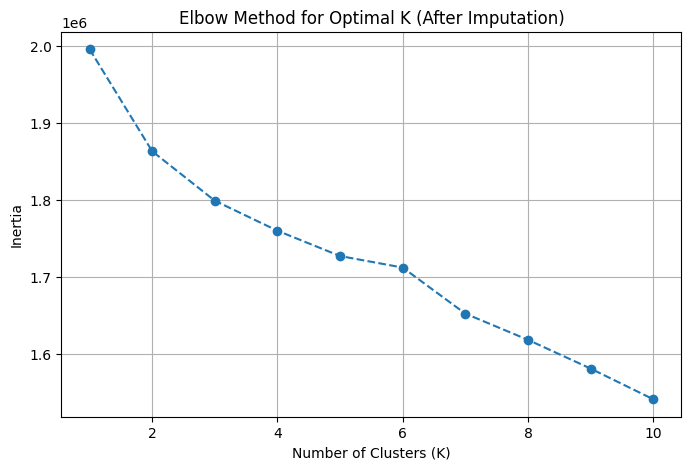

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean for numerical columns
imputer = SimpleImputer(strategy="mean")
data_imputed = pd.DataFrame(imputer.fit_transform(data_scaled), columns=numerical_cols)

# Verifying that there are no more missing values
print("Dataset after imputing missing values (Preview):")
print(data_imputed.head())

# Re-run the Elbow Method to determine the optimal number of clusters
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_imputed)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K (After Imputation)')
plt.grid(True)
plt.show()

Cluster Centroids (K=4):
   customer_region  customer_age  vendor_count  product_count  is_chain  \
0        -0.100981     -0.007185     -0.612857      -0.672387 -0.476913   
1        -0.701580     -0.002090      0.803125       0.868810  0.871734   
2         1.179104      0.023329      0.824076       0.806074  0.312388   
3         1.062462      0.014502     -0.180685       0.059695 -0.420820   

   first_order  last_order  last_promo  payment_method  CUI_American  ...  \
0     0.334586   -0.341595   -0.196705        0.149907     -0.144318  ...   
1    -0.508485    0.454069    0.257164       -0.182546      0.131261  ...   
2    -0.350154    0.434390    0.262121       -0.255674      0.398031  ...   
3     0.164488   -0.073108   -0.050505        0.104209     -0.247133  ...   

   CUI_Healthy_Proportion  CUI_Indian_Proportion  CUI_Italian_Proportion  \
0                0.022550               0.033426                0.074707   
1                0.010983               0.143852             

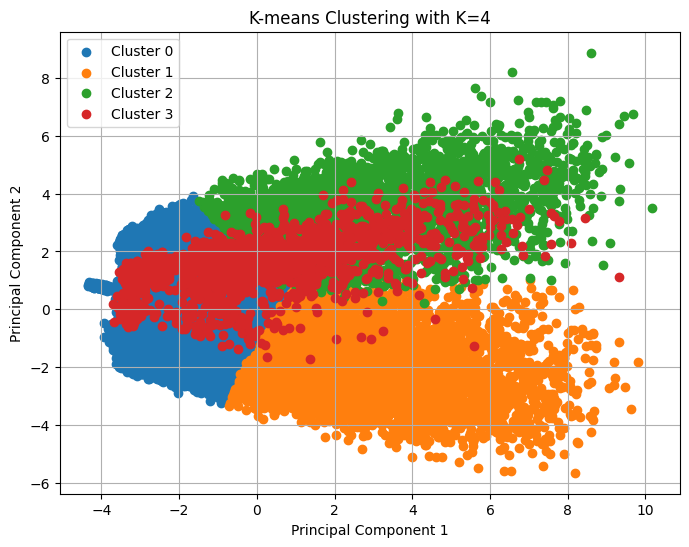

In [ ]:
# Perform K-means clustering with K=4
kmeans = KMeans(n_clusters=4, random_state=42)
data_imputed['Cluster'] = kmeans.fit_predict(data_imputed)

# Analyze the centroids of the clusters
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data_imputed.columns[:-1])

# Display the cluster centroids for interpretation
print("Cluster Centroids (K=4):")
print(centroids)

# Visualize clusters using PCA for dimensionality reduction
# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(data_imputed.iloc[:, :-1])

# Plotting the clusters
plt.figure(figsize=(8, 6))
for cluster in range(4):
    plt.scatter(data_pca[data_imputed['Cluster'] == cluster, 0],
                data_pca[data_imputed['Cluster'] == cluster, 1], label=f'Cluster {cluster}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with K=4')
plt.legend()
plt.grid(True)
plt.show()

Cluster Centroids (K=5):
   customer_region  customer_age  vendor_count  product_count  is_chain  \
0        -0.078090     -0.007972     -0.618747      -0.678964 -0.482174   
1        -0.472526     -0.005426     -0.012343       0.021840  0.082859   
2         1.177309      0.028816      0.832398       0.817831  0.315342   
3         1.059455      0.016812     -0.181789       0.057153 -0.418514   
4        -0.684959     -0.003604      0.802430       0.858989  0.862987   

   first_order  last_order  last_promo  payment_method  CUI_American  ...  \
0     0.339037   -0.343527   -0.192700        0.149092     -0.129953  ...   
1    -0.030594   -0.026124   -0.092073        0.027001     -0.313187  ...   
2    -0.347021    0.438862    0.261579       -0.255452      0.406350  ...   
3     0.166212   -0.074513   -0.050618        0.105151     -0.249530  ...   
4    -0.509992    0.454352    0.261654       -0.183749      0.150156  ...   

   CUI_Healthy_Proportion  CUI_Indian_Proportion  CUI_Italian

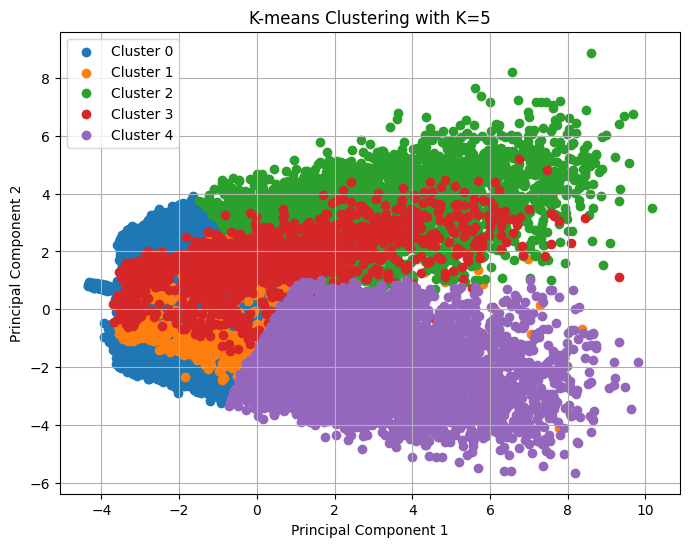

In [ ]:
# Perform K-means clustering with K=5
kmeans_5 = KMeans(n_clusters=5, random_state=42)
data_imputed['Cluster_K5'] = kmeans_5.fit_predict(data_imputed.iloc[:, :-1])  # Use all columns except the last one

# Analyze the centroids of the clusters for K=5
centroids_5 = pd.DataFrame(kmeans_5.cluster_centers_, columns=data_imputed.columns[:-2])  # Exclude both cluster columns

# Display the cluster centroids for K=5
print("Cluster Centroids (K=5):")
print(centroids_5)

# Visualize clusters using PCA for dimensionality reduction with K=5
data_pca_5 = pca.fit_transform(data_imputed.iloc[:, :-2])  # Exclude both cluster columns

# Plotting the clusters for K=5
plt.figure(figsize=(8, 6))
for cluster in range(5):
    plt.scatter(data_pca_5[data_imputed['Cluster_K5'] == cluster, 0],
                data_pca_5[data_imputed['Cluster_K5'] == cluster, 1], label=f'Cluster {cluster}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with K=5')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Score for K=4
silhouette_k4 = silhouette_score(data_imputed.iloc[:, :-2], data_imputed['Cluster'])
print(f"Silhouette Score for K=4: {silhouette_k4:.4f}")

# Compute Silhouette Score for K=5
silhouette_k5 = silhouette_score(data_imputed.iloc[:, :-2], data_imputed['Cluster_K5'])
print(f"Silhouette Score for K=5: {silhouette_k5:.4f}")

# Profiling clusters for K=4
print("\nCluster Profiling for K=4:")
cluster_profiles_k4 = data_imputed.groupby('Cluster').mean()
print(cluster_profiles_k4)

# Profiling clusters for K=5
print("\nCluster Profiling for K=5:")
cluster_profiles_k5 = data_imputed.groupby('Cluster_K5').mean()
print(cluster_profiles_k5)


Silhouette Score for K=4: 0.0568
Silhouette Score for K=5: 0.0615

Cluster Profiling for K=4:
         customer_region  customer_age  vendor_count  product_count  is_chain  \
Cluster                                                                         
0              -0.101429     -0.007344     -0.613165      -0.672614 -0.477139   
1              -0.701610     -0.001913      0.803174       0.868759  0.871723   
2               1.179282      0.023402      0.822912       0.804445  0.311609   
3               1.062333      0.014779     -0.181435       0.059664 -0.420774   

         first_order  last_order  last_promo  payment_method  CUI_American  \
Cluster                                                                      
0           0.334831   -0.341596   -0.196871        0.150199     -0.144880   
1          -0.508420    0.453738    0.257018       -0.182623      0.132181   
2          -0.349683    0.433900    0.261782       -0.255429      0.397338   
3           0.164027   -0.073

While the score for 𝐾=5, K=5 is slightly better, both scores are relatively low, suggesting that the clusters may not be well-defined in the feature space. This could indicate overlapping clusters or insufficient separation between groups.

SOM with K-Means

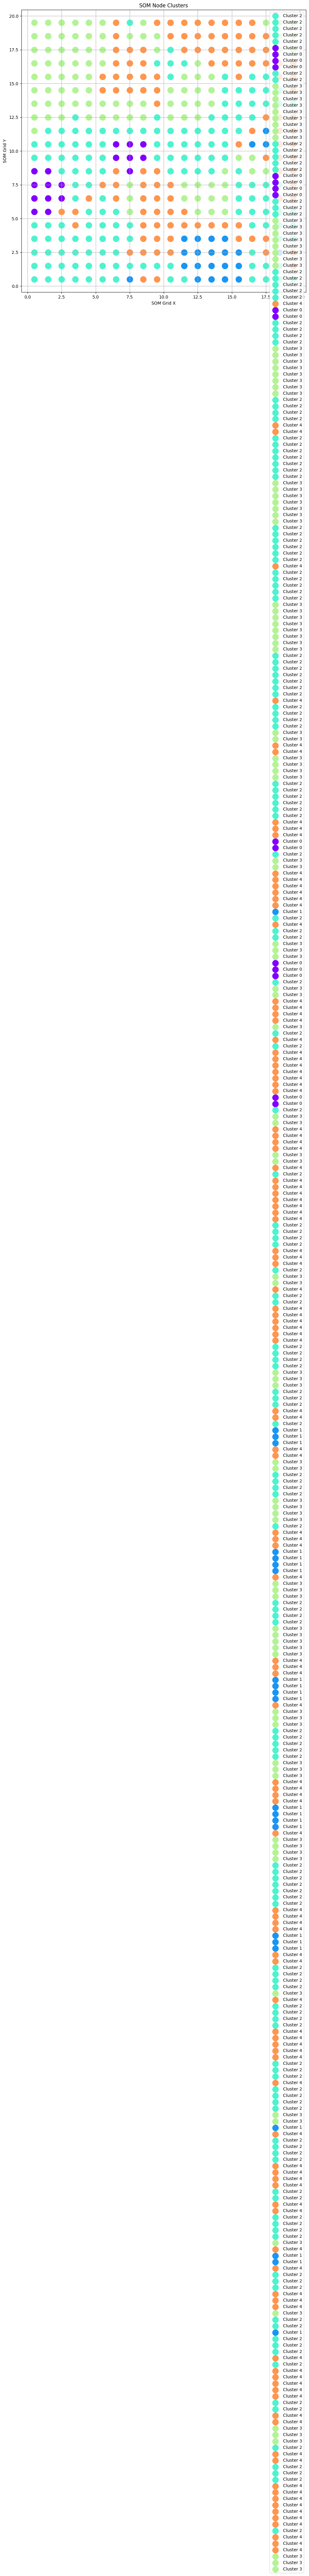

In [ ]:
# Ensure only features are passed to the SOM (exclude cluster columns)
data_som = data_imputed.iloc[:, :-2].values  # Exclude both cluster columns

# Train SOM with increased iterations and larger grid
som_dim = 20
som = MiniSom(x=som_dim, y=som_dim, input_len=data_som.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)
som.random_weights_init(data_som)
som.train_random(data_som, 5000)  # Increase number of iterations

# Initialize K-means for clustering the SOM weights
kmeans_som = KMeans(n_clusters=5, random_state=42)

# Extract SOM weights and cluster them
weights = np.array([som.get_weights()[x, y] for x in range(som_dim) for y in range(som_dim)]).reshape(-1, data_som.shape[1])
som_clusters = kmeans_som.fit_predict(weights)

# Assign data points to SOM clusters
data_imputed['SOM_Cluster'] = [
    som_clusters[som.winner(data_point)[0] * som_dim + som.winner(data_point)[1]]
    for data_point in data_som
]

# Visualize SOM clusters with better markers
plt.figure(figsize=(12, 12))
for x in range(som_dim):
    for y in range(som_dim):
        cluster = som_clusters[x * som_dim + y]
        plt.scatter(x + 0.5, y + 0.5, color=plt.cm.rainbow(cluster / 5), s=200, label=f'Cluster {cluster}' if cluster not in plt.gca().get_legend_handles_labels()[1] else "")

plt.title("SOM Node Clusters")
plt.xlabel("SOM Grid X")
plt.ylabel("SOM Grid Y")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Analyze the distribution of data points across SOM clusters
cluster_counts = data_imputed['SOM_Cluster'].value_counts()

# Display the counts of data points in each cluster
print("Data Points per SOM Cluster:")
print(cluster_counts)

# Compute summary statistics for each cluster
cluster_summary = data_imputed.groupby('SOM_Cluster').mean()

# Display the summary statistics for SOM clusters
print("\nSummary Statistics for SOM Clusters:")
print(cluster_summary)

Data Points per SOM Cluster:
SOM_Cluster
2    16769
3     4055
4     3082
1     1530
0      854
Name: count, dtype: int64

Summary Statistics for SOM Clusters:
             customer_region  customer_age  vendor_count  product_count  \
SOM_Cluster                                                               
0                  -0.553800     -0.015479      0.103016       0.109998   
1                  -0.320607     -0.058873     -0.061900       0.293532   
2                  -0.090303     -0.012697     -0.398695      -0.464735   
3                   1.121079      0.051970      0.748315       0.821076   
4                  -0.671062      0.034220      1.186900       1.272111   

             is_chain  first_order  last_order  last_promo  payment_method  \
SOM_Cluster                                                                  
0            0.124075    -0.077779    0.104940    0.063157       -0.030146   
1           -0.475882    -0.137349    0.324249    0.385029       -0.273622   
2 

Summary Statistics:

Each cluster has distinct characteristics, with differences in features like customer_region, product_count, and others.
For instance:
Cluster 4 has the highest average product_count and vendor_count.
Cluster 3 appears to have more significant values for is_chain.

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Compute Silhouette Score for SOM-based clustering
silhouette_som = silhouette_score(data_som, data_imputed['SOM_Cluster'])
print(f"Silhouette Score for SOM-based Clustering: {silhouette_som:.4f}")

# Compute Davies-Bouldin Index for SOM-based clustering
davies_bouldin_som = davies_bouldin_score(data_som, data_imputed['SOM_Cluster'])
print(f"Davies-Bouldin Index for SOM-based Clustering: {davies_bouldin_som:.4f}")

Silhouette Score for SOM-based Clustering: 0.0391
Davies-Bouldin Index for SOM-based Clustering: 3.1729


Hierarchical clustering combined with SOM and K-means


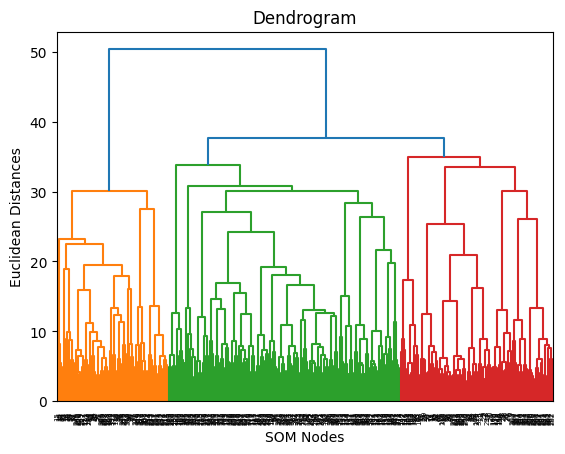

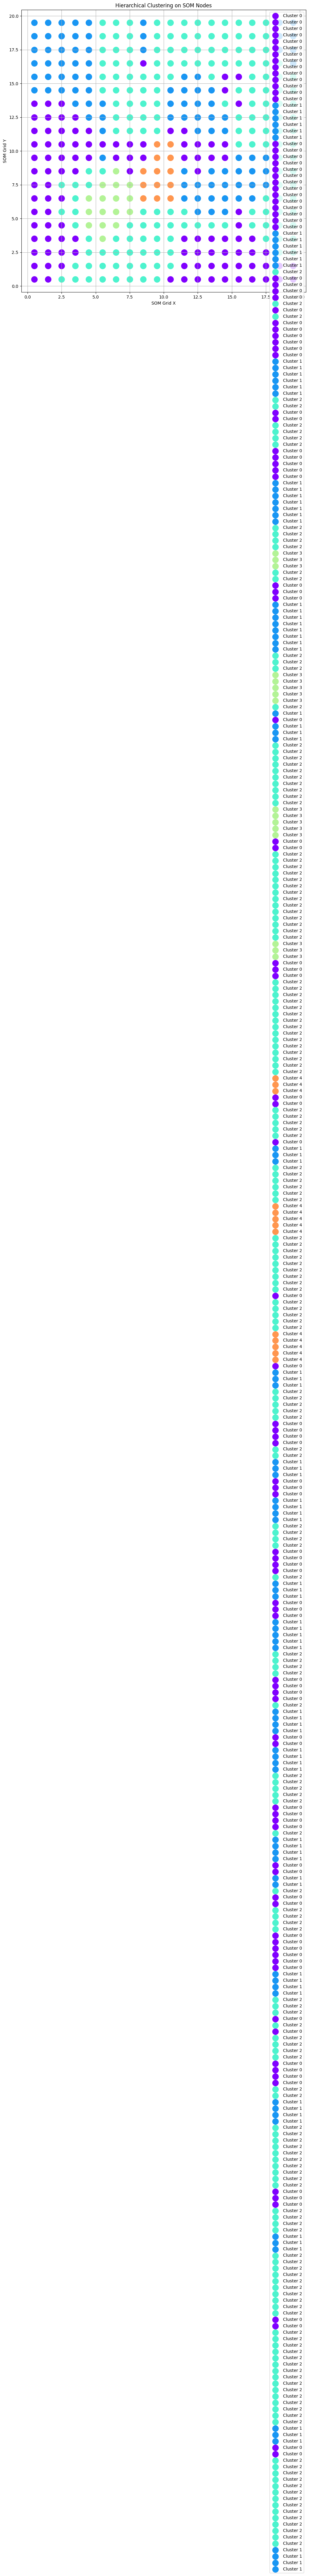

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np

# Train SOM (reuse the existing SOM model)
som_dim = 20
som = MiniSom(x=som_dim, y=som_dim, input_len=data_som.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)
som.random_weights_init(data_som)
som.train_random(data_som, 5000)  # Train SOM

# Extract SOM weights
weights = np.array([som.get_weights()[x, y] for x in range(som_dim) for y in range(som_dim)]).reshape(-1, data_som.shape[1])

# Apply Hierarchical Clustering to SOM weights
dendrogram = sch.dendrogram(sch.linkage(weights, method='ward'))
plt.title('Dendrogram')
plt.xlabel('SOM Nodes')
plt.ylabel('Euclidean Distances')
plt.show()

# Choose the number of clusters based on the dendrogram
n_clusters = 5  # Adjust based on dendrogram insights
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
som_clusters = hierarchical_clustering.fit_predict(weights)

# Assign hierarchical clusters to data points based on SOM nodes
data_imputed['HC_SOM_Cluster'] = [
    som_clusters[som.winner(data_point)[0] * som_dim + som.winner(data_point)[1]]
    for data_point in data_som
]

# Visualize SOM clusters with hierarchical clustering
plt.figure(figsize=(12, 12))
for x in range(som_dim):
    for y in range(som_dim):
        cluster = som_clusters[x * som_dim + y]
        plt.scatter(x + 0.5, y + 0.5, color=plt.cm.rainbow(cluster / n_clusters), s=200, label=f'Cluster {cluster}' if cluster not in plt.gca().get_legend_handles_labels()[1] else "")

plt.title("Hierarchical Clustering on SOM Nodes")
plt.xlabel("SOM Grid X")
plt.ylabel("SOM Grid Y")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Analyze the distribution of data points across hierarchical SOM clusters
hc_cluster_counts = data_imputed['HC_SOM_Cluster'].value_counts()

# Display the counts of data points in each cluster
print("Data Points per Hierarchical SOM Cluster:")
print(hc_cluster_counts)

# Compute summary statistics for each hierarchical SOM cluster
hc_cluster_summary = data_imputed.groupby('HC_SOM_Cluster').mean()

# Display the summary statistics for hierarchical SOM clusters
print("\nSummary Statistics for Hierarchical SOM Clusters:")
print(hc_cluster_summary)

Data Points per Hierarchical SOM Cluster:
HC_SOM_Cluster
0    12636
2     7105
1     5189
3      691
4      669
Name: count, dtype: int64

Summary Statistics for Hierarchical SOM Clusters:
                customer_region  customer_age  vendor_count  product_count  \
HC_SOM_Cluster                                                               
0                     -0.080403      0.016444     -0.439462      -0.421580   
1                      1.013073      0.029459      0.310281       0.354065   
2                     -0.502322     -0.053129      0.543626       0.469660   
3                      0.118999      0.021035      0.006577      -0.021630   
4                     -1.127199      0.003426      0.113583       0.250908   

                is_chain  first_order  last_order  last_promo  payment_method  \
HC_SOM_Cluster                                                                  
0              -0.367381     0.184975   -0.226194   -0.092180        0.093007   
1              -0.043

Each cluster exhibits distinct characteristics:
Cluster 1 has higher averages for features like customer_region and product_count, suggesting customers in this cluster are likely active in larger regions and order more products.
Cluster 2 shows higher averages for is_chain, indicating a preference for chain restaurants.
Cluster 4 has higher averages for features related to recent activity (e.g., last_order and last_promo).

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Compute Silhouette Score for hierarchical SOM-based clustering
silhouette_hc_som = silhouette_score(data_som, data_imputed['HC_SOM_Cluster'])
print(f"Silhouette Score for Hierarchical SOM-based Clustering: {silhouette_hc_som:.4f}")

# Compute Davies-Bouldin Index for hierarchical SOM-based clustering
davies_bouldin_hc_som = davies_bouldin_score(data_som, data_imputed['HC_SOM_Cluster'])
print(f"Davies-Bouldin Index for Hierarchical SOM-based Clustering: {davies_bouldin_hc_som:.4f}")


Silhouette Score for Hierarchical SOM-based Clustering: 0.0630
Davies-Bouldin Index for Hierarchical SOM-based Clustering: 3.4855


DBSCAN

In [ ]:
# Apply DBSCAN with adjusted parameters
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Increase eps to form clusters
dbscan_clusters = dbscan.fit_predict(data_som)

# Add DBSCAN cluster assignments to the dataset
data_imputed['DBSCAN_Cluster'] = dbscan_clusters

# Analyze the cluster assignments
dbscan_cluster_counts = data_imputed['DBSCAN_Cluster'].value_counts()

# Display the counts of data points in each cluster
print("Data Points per DBSCAN Cluster (Adjusted eps):")
print(dbscan_cluster_counts)

# Compute summary statistics for DBSCAN clusters (exclude noise if present, labeled as -1)
dbscan_cluster_summary = data_imputed[data_imputed['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean()

# Display the summary statistics for DBSCAN clusters
print("\nSummary Statistics for DBSCAN Clusters (Adjusted eps):")
print(dbscan_cluster_summary)

Data Points per DBSCAN Cluster (Adjusted eps):
DBSCAN_Cluster
-1    26137
 0      118
 1        9
 2        8
 4        8
 3        5
 5        5
Name: count, dtype: int64

Summary Statistics for DBSCAN Clusters (Adjusted eps):
                customer_region  customer_age  vendor_count  product_count  \
DBSCAN_Cluster                                                               
0                      1.291008     -0.138529     -1.656631      -1.476502   
1                     -0.293856     -0.379593     -0.956706      -1.078829   
2                     -0.466514     -0.281686     -0.956706      -1.029120   
3                     -0.329370     -0.303178     -0.956706      -0.999294   
4                     -0.378638      0.040691     -0.956706      -1.078829   
5                     -0.289417     -0.543886     -0.956706      -1.078829   

                is_chain  first_order  last_order  last_promo  payment_method  \
DBSCAN_Cluster                                                    

K-Prototypes

In [ ]:
from kmodes.kprototypes import KPrototypes

# Explicitly specify the indices of categorical columns
categorical_indices = [data_imputed.columns.get_loc(col) for col in ['last_promo', 'payment_method', 'age_category', 'Favorite_Cuisine']]

# Apply K-Prototypes clustering
n_clusters = 5  # Adjust as needed
kprototypes = KPrototypes(n_clusters=n_clusters, init='Huang', random_state=42)
kprototypes_clusters = kprototypes.fit_predict(data_imputed.values, categorical=categorical_indices)

# Add K-Prototypes cluster assignments to the dataset
data_imputed['KPrototypes_Cluster'] = kprototypes_clusters

# Analyze the cluster assignments
kprototypes_cluster_counts = data_imputed['KPrototypes_Cluster'].value_counts()

# Display the counts of data points in each cluster
print("Data Points per K-Prototypes Cluster:")
print(kprototypes_cluster_counts)

# Compute summary statistics for K-Prototypes clusters
kprototypes_cluster_summary = data_imputed.groupby('KPrototypes_Cluster').mean()

# Display the summary statistics for K-Prototypes clusters
print("\nSummary Statistics for K-Prototypes Clusters:")
print(kprototypes_cluster_summary)

Data Points per K-Prototypes Cluster:
KPrototypes_Cluster
0    12272
2     6168
1     3752
3     2359
4     1739
Name: count, dtype: int64

Summary Statistics for K-Prototypes Clusters:
                     customer_region  customer_age  vendor_count  \
KPrototypes_Cluster                                                
0                          -0.012395     -0.008611     -0.620945   
1                           1.178077      0.020483      0.838251   
2                          -0.645761     -0.008982      0.841107   
3                          -0.902768      0.018535     -0.147001   
4                           1.060752      0.023290     -0.210495   

                     product_count  is_chain  first_order  last_order  \
KPrototypes_Cluster                                                     
0                        -0.679828 -0.499705     0.345645   -0.335136   
1                         0.820291  0.318418    -0.350393    0.437013   
2                         0.894061  0.858033 

Clusters exhibit distinct characteristics:
Cluster 1 has higher averages for features like customer_region, product_count, and is_chain, indicating customers who are likely loyal to chain restaurants and order a higher number of products.
Cluster 3 has lower averages for vendor_count and product_count, suggesting customers with limited activity.
Cluster 4 appears to have moderate activity across most features but is slightly more diverse in terms of age categories.

In [34]:
# Prepare numerical data for evaluation (excluding the cluster column)
numerical_data = data_imputed.select_dtypes(include=[np.number]).drop(['KPrototypes_Cluster'], axis=1).values
clusters = data_imputed['KPrototypes_Cluster'].values

# Compute Silhouette Score for K-Prototypes clustering
silhouette_kprototypes = silhouette_score(numerical_data, clusters)
print(f"Silhouette Score for K-Prototypes Clustering: {silhouette_kprototypes:.4f}")

# Compute Davies-Bouldin Index for K-Prototypes clustering
davies_bouldin_kprototypes = davies_bouldin_score(numerical_data, clusters)
print(f"Davies-Bouldin Index for K-Prototypes Clustering: {davies_bouldin_kprototypes:.4f}")

Silhouette Score for K-Prototypes Clustering: 0.1020
Davies-Bouldin Index for K-Prototypes Clustering: 2.9116
